# **Assessment 2**

For our second assessment, we will be looking at sequential weather data. The data contains a number of relevant weather variables, recorded daily for a European city during a period of four decades.

However, this dataset has been corrupted, and some of the daily measurements are now missing. The goal of this assessment is to develop a neural network architecture that can recover the missing measurements!

<br>

---

<br>

The dataset has been saved as `.csv` files and has been separated into a `training_set/` folder and a `test_set.csv` file. The `training_set/` contains data for three of the four decades, separated in one individual file per decade:

- `training_set_0.csv` contains corrupted data for the first decade; `training_set_0_nogaps.csv` contains the same data before it was corrupted.
- `training_set_1.csv` contains corrupted data for the second decade; `training_set_1_nogaps.csv` contains the same data before it was corrupted.
- `training_set_2.csv` contains corrupted data for the third decade; `training_set_2_nogaps.csv` contains the same data before it was corrupted.

The `test_set.csv` file contains the remaining decade; this data is corrupted and contains gaps, but we have lost access to the data before corruption.

The architecture that you design in this assessment should use the data contained inside the `training_set` in order to recover the missing information in the data in `test_set.csv`. Note that decades `0`, `1`, and `2` are not necessarily consecutive.

Inside each of the `.csv` files, you will find the following columns:

- `date`
- `cloud_cover`
- `sunshine`
- `global_radiation`
- `max_temp`
- `mean_temp`
- `min_temp`
- `precipitation`
- `pressure`

<br>

All answers to the assessment should be contained within the structure below, but you are free to add new code and text cells as required to your answers. Read the text for each question and follow the instructions carefully. Answers that do not follow this structure will not be marked. **Do NOT change the name of this file.**

Please, **make sure to execute all your cells and save the result of the execution**. We will only mark cells that have been executed and will not execute any cells ourselves.

<br>

---

<br>

<br><br>

## **Question 1**  (25%)

Load the training and test datasets. Then, use the space below to present the following set of figures:

1. Using line plots, show the different variables in each dataset, both before and after corruption. Choose a single decade to plot, and plot the first 365 days of data. Plot the time series for each variable in an independent axis window. Make sure the axis windows are sized appropriately so that trends and corruption in the variables can be easily observed.
2. Plot a histogram for each variable in each dataset, across all decades, both before and after corruption.

<br>

In [1]:
import os
import sys
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

No GPU available!


In [3]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Mounted at /content/drive


Load train datasets

In [4]:
train_corrupt_path_0 = "/content/drive/MyDrive/dataset_dl2/training_set/training_set_0.csv"
train_corrupt_data_0 = pd.read_csv(train_corrupt_path_0)
print(train_corrupt_data_0.shape)

(3652, 9)


In [5]:
train_clean_path_0 = "/content/drive/MyDrive/dataset_dl2/training_set/training_set_0_nogaps.csv"
train_clean_data_0 = pd.read_csv(train_clean_path_0)
print(train_clean_data_0.shape)

(3652, 9)


In [6]:
train_corrupt_path_1 = "/content/drive/MyDrive/dataset_dl2/training_set/training_set_1.csv"
train_corrupt_data_1 = pd.read_csv(train_corrupt_path_1)
print(train_corrupt_data_1.shape)

(3651, 9)


In [7]:
train_clean_path_1 = "/content/drive/MyDrive/dataset_dl2/training_set/training_set_1_nogaps.csv"
train_clean_data_1 = pd.read_csv(train_clean_path_1)
print(train_clean_data_1.shape)

(3651, 9)


In [8]:
train_corrupt_path_2 = "/content/drive/MyDrive/dataset_dl2/training_set/training_set_2.csv"
train_corrupt_data_2 = pd.read_csv(train_corrupt_path_2)
print(train_corrupt_data_2.shape)

(3651, 9)


In [9]:
train_clean_path_2 = "/content/drive/MyDrive/dataset_dl2/training_set/training_set_2_nogaps.csv"
train_clean_data_2 = pd.read_csv(train_clean_path_2)
print(train_clean_data_2.shape)

(3651, 9)


Load test datasets

In [10]:
test_path = "/content/drive/MyDrive/dataset_dl2/test_set.csv"
test_data = pd.read_csv(test_path)
print(test_data.shape)

(3652, 9)


check dataset

In [11]:
train_clean_data_0.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure'],
      dtype='object')

In [ ]:
train_corrupt_data_0.iloc[4]

date                     4.0
cloud_cover              3.9
sunshine                 1.3
global_radiation        19.5
max_temp                 8.4
mean_temp                NaN
min_temp                 1.7
precipitation            0.0
pressure            100625.2
Name: 4, dtype: float64

Line plots

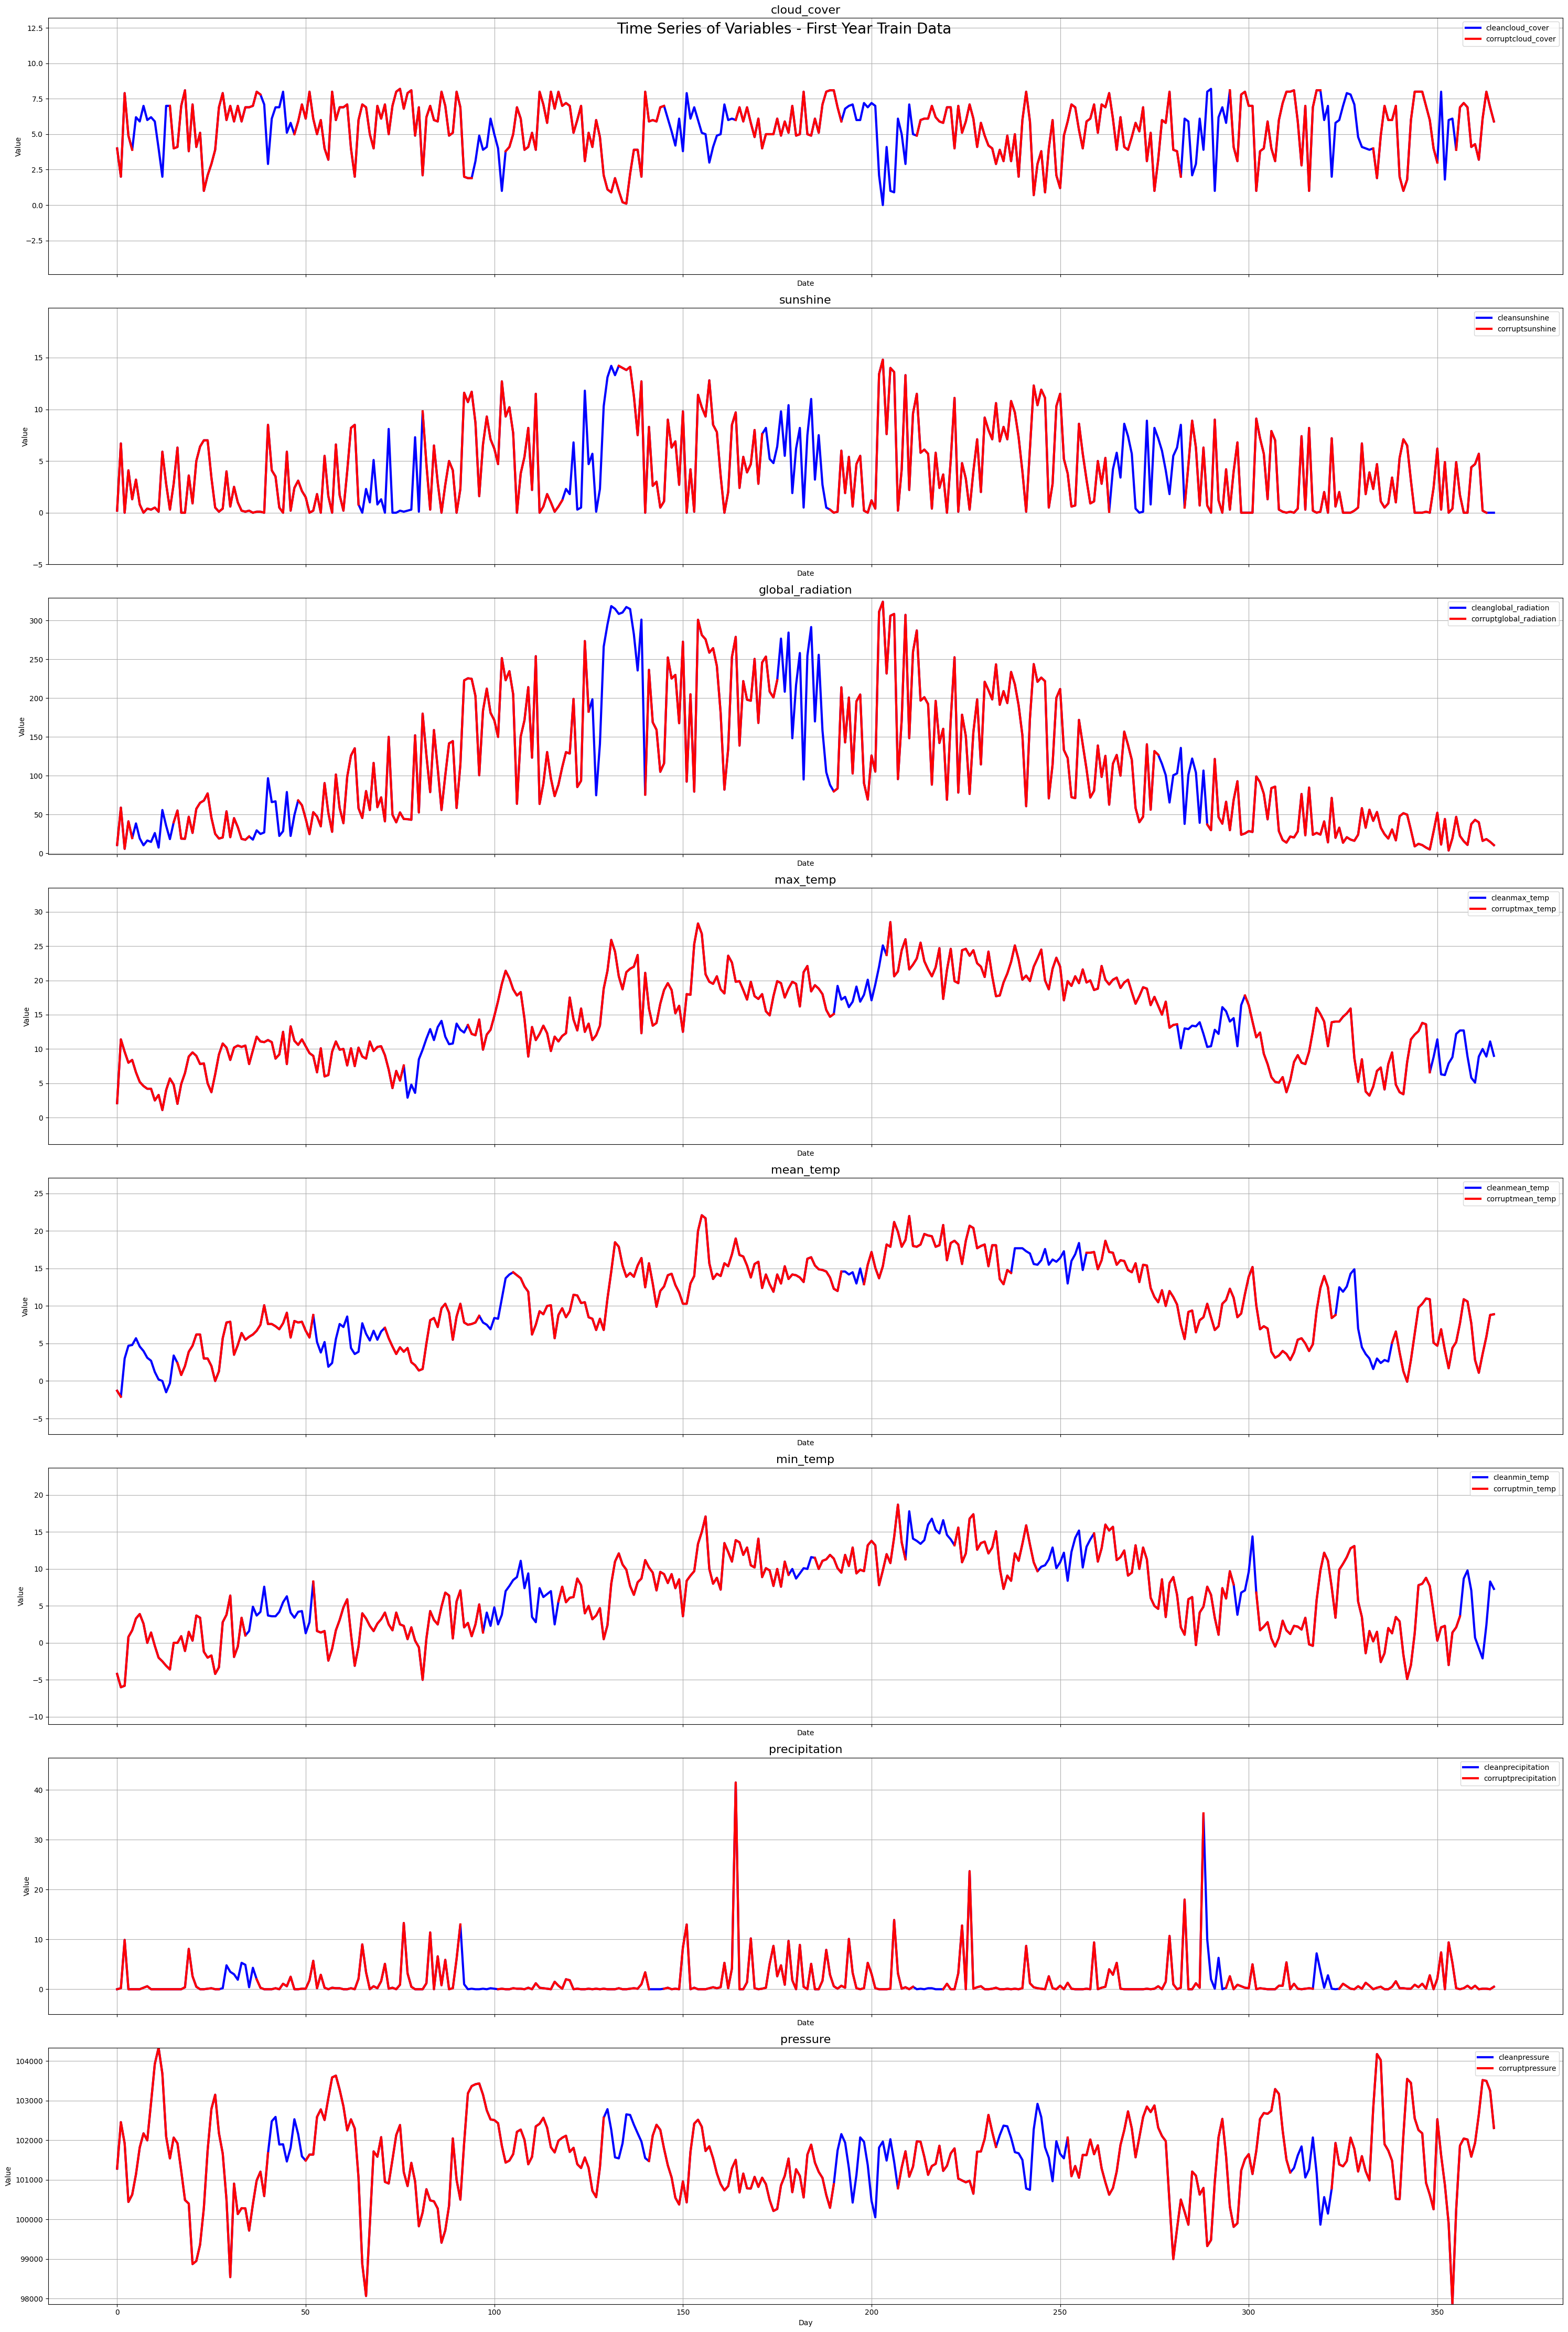

In [12]:
train_corrupt_data_0['date'] = train_corrupt_data_0['date'].astype(int)
first_year_corrupt_data = train_corrupt_data_0[train_corrupt_data_0['date'] <= 365]
train_clean_data_0['date'] = train_clean_data_0['date'].astype(int)
first_year_clean_data = train_clean_data_0[train_clean_data_0['date'] <= 365]

variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
             'mean_temp', 'min_temp', 'precipitation', 'pressure']

fig, axes = plt.subplots(len(variables), 1, figsize=(30, 45), sharex=True)
fig.tight_layout(pad = 4.0)

for i, var in enumerate(variables):
    ax = axes[i]
    ax.plot(first_year_clean_data['date'], first_year_clean_data[var], label='clean'+var, color='blue', linewidth=3)
    ax.plot(first_year_corrupt_data['date'], first_year_corrupt_data[var], label='corrupt'+var, color='red', linewidth=3)
    ax.set_title(var, fontsize=16)
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.set_ylim(first_year_corrupt_data[var].min() - 5, first_year_corrupt_data[var].max() + 5)
    ax.legend()

fig.suptitle('Time Series of Variables - First Year Train Data', fontsize=20)
plt.xlabel("Day")
plt.tight_layout()
plt.show()


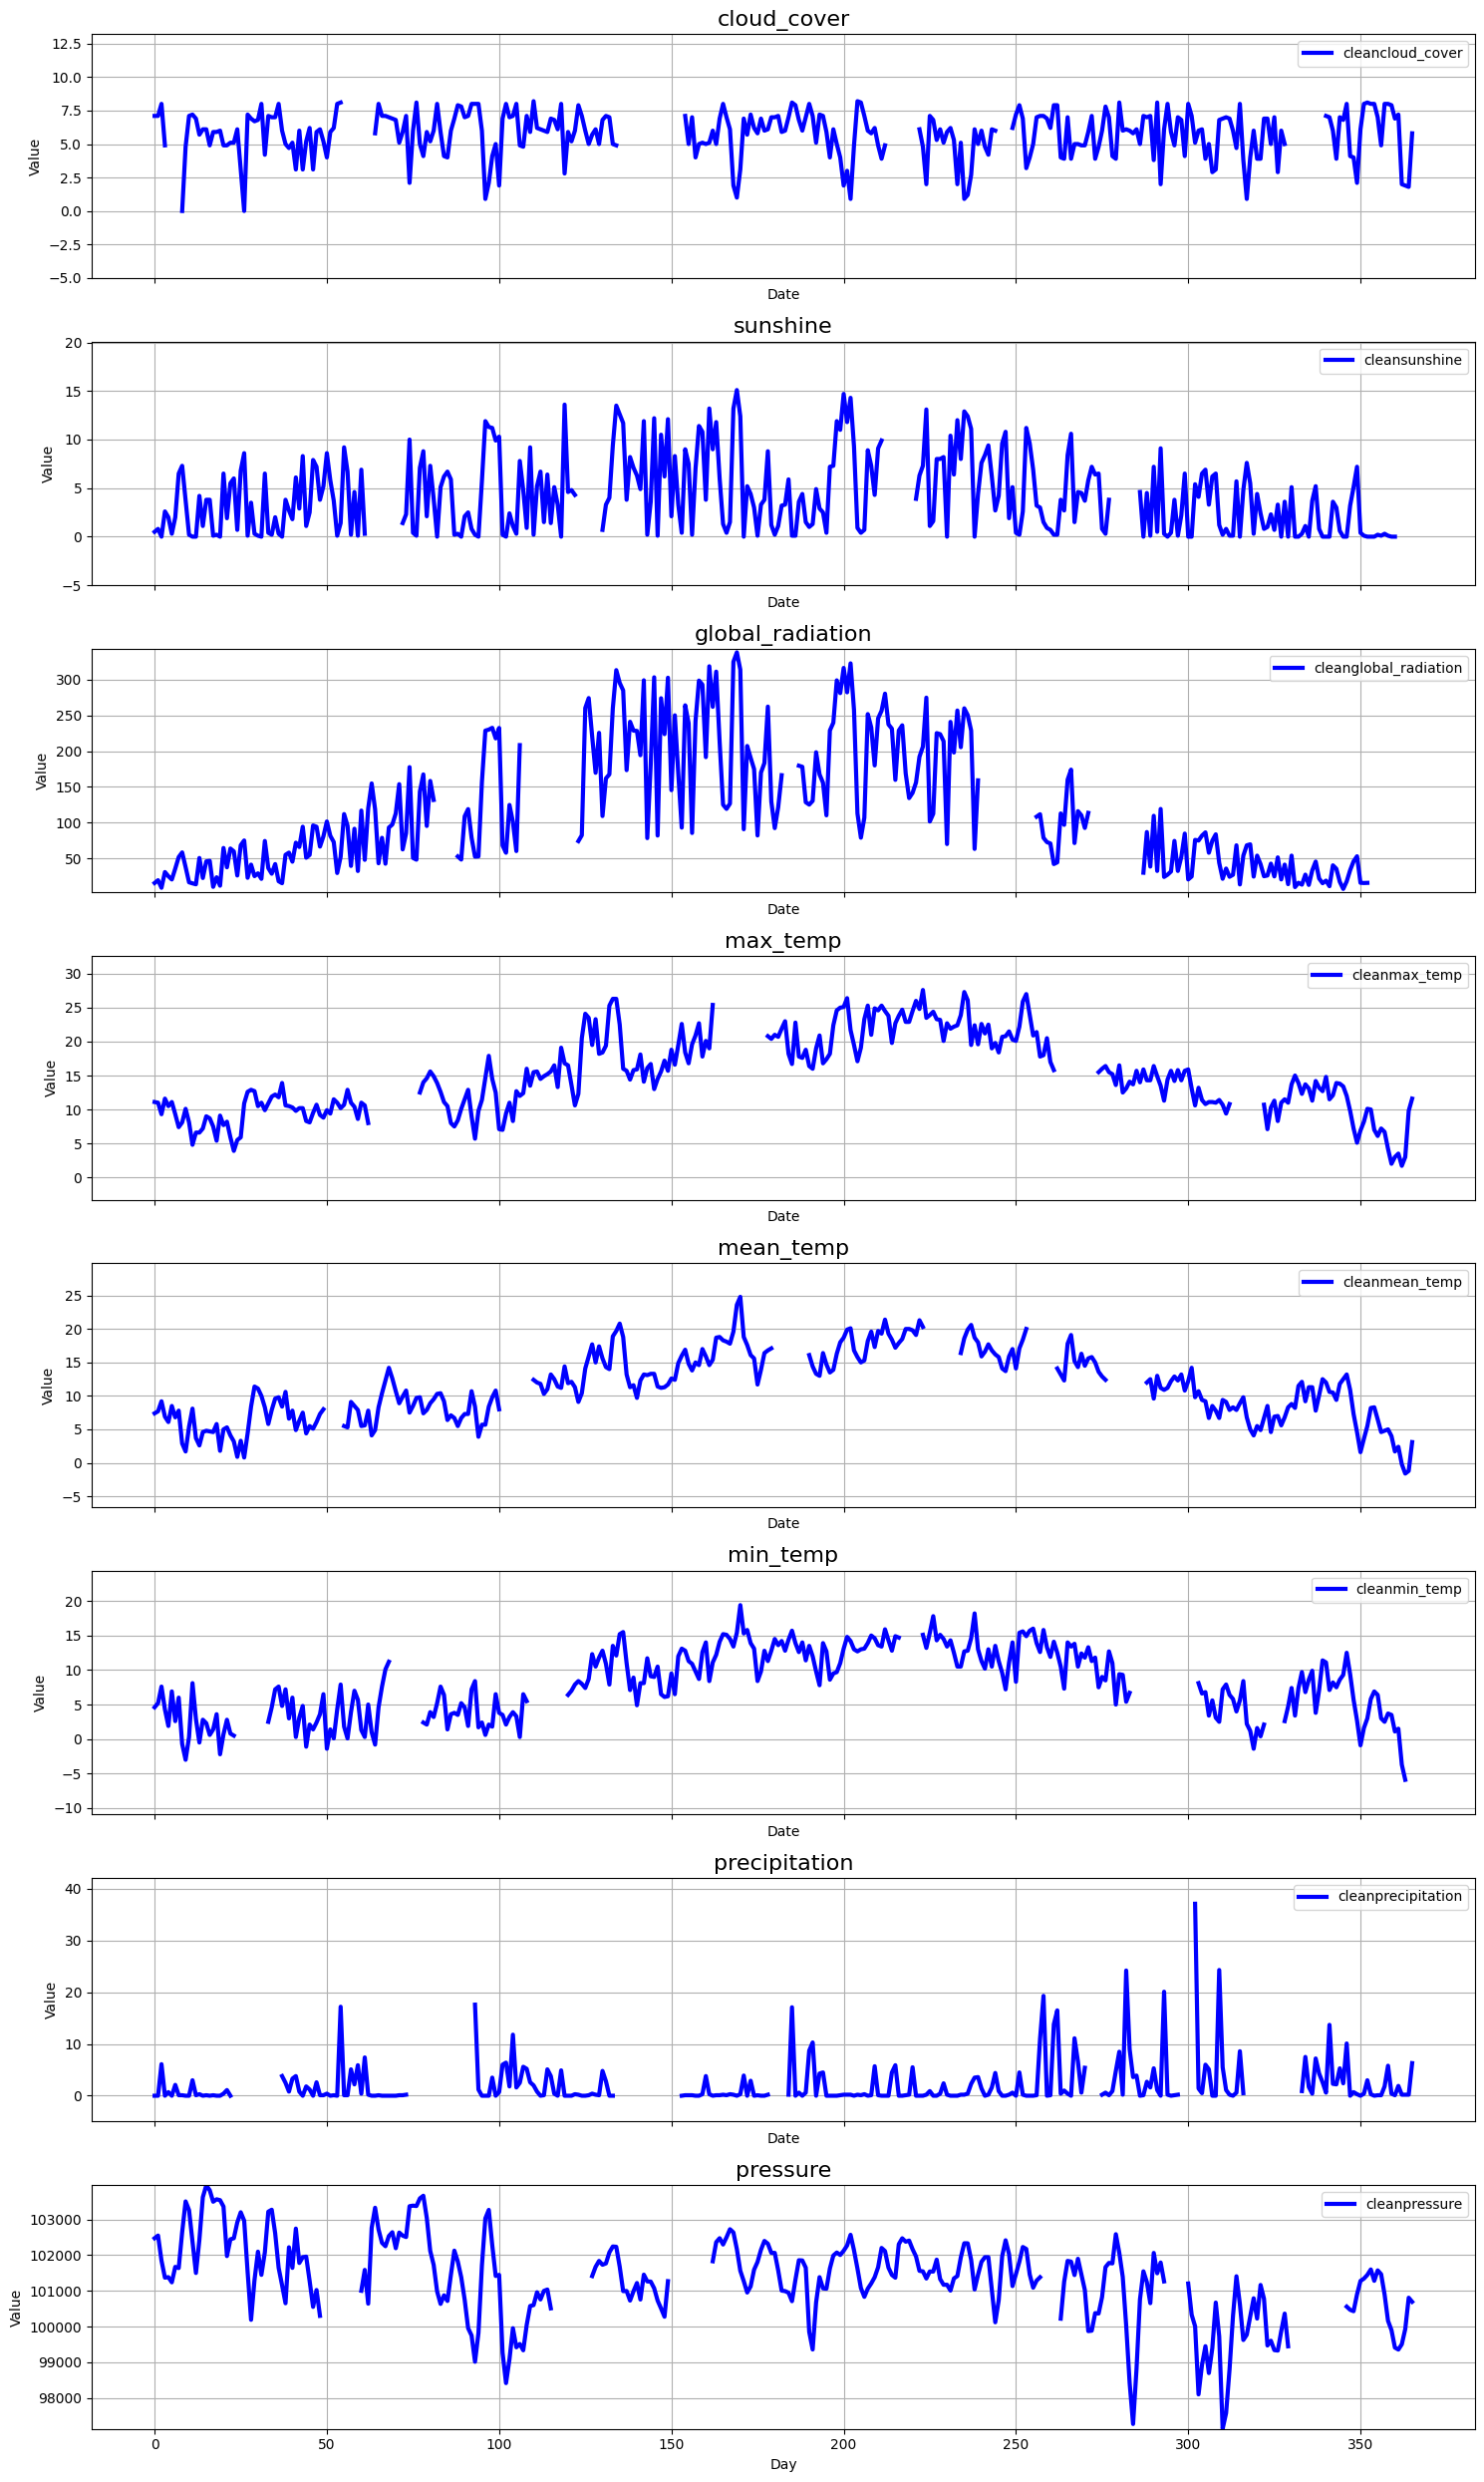

In [13]:
test_data['date'] = test_data['date'].astype(int)
first_year_test_data = test_data[test_data['date'] <= 365]

variables = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
             'mean_temp', 'min_temp', 'precipitation', 'pressure']

fig, axes = plt.subplots(len(variables), 1, figsize=(15, 25), sharex=True)
fig.tight_layout(pad = 4.0)

for i, var in enumerate(variables):
    ax = axes[i]
    ax.plot(first_year_test_data['date'], first_year_test_data[var], label='clean'+var, color='blue', linewidth=3)
    ax.set_title(var, fontsize=16)
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.set_ylim(first_year_test_data[var].min() - 5, first_year_test_data[var].max() + 5)
    ax.legend()

# fig.suptitle('Time Series of Variables - First Year Test Data', fontsize=15)
plt.xlabel("Day")
plt.tight_layout()
plt.show()


Plot a histogram for each variable in each dataset, across all decades, both before and after corruption.


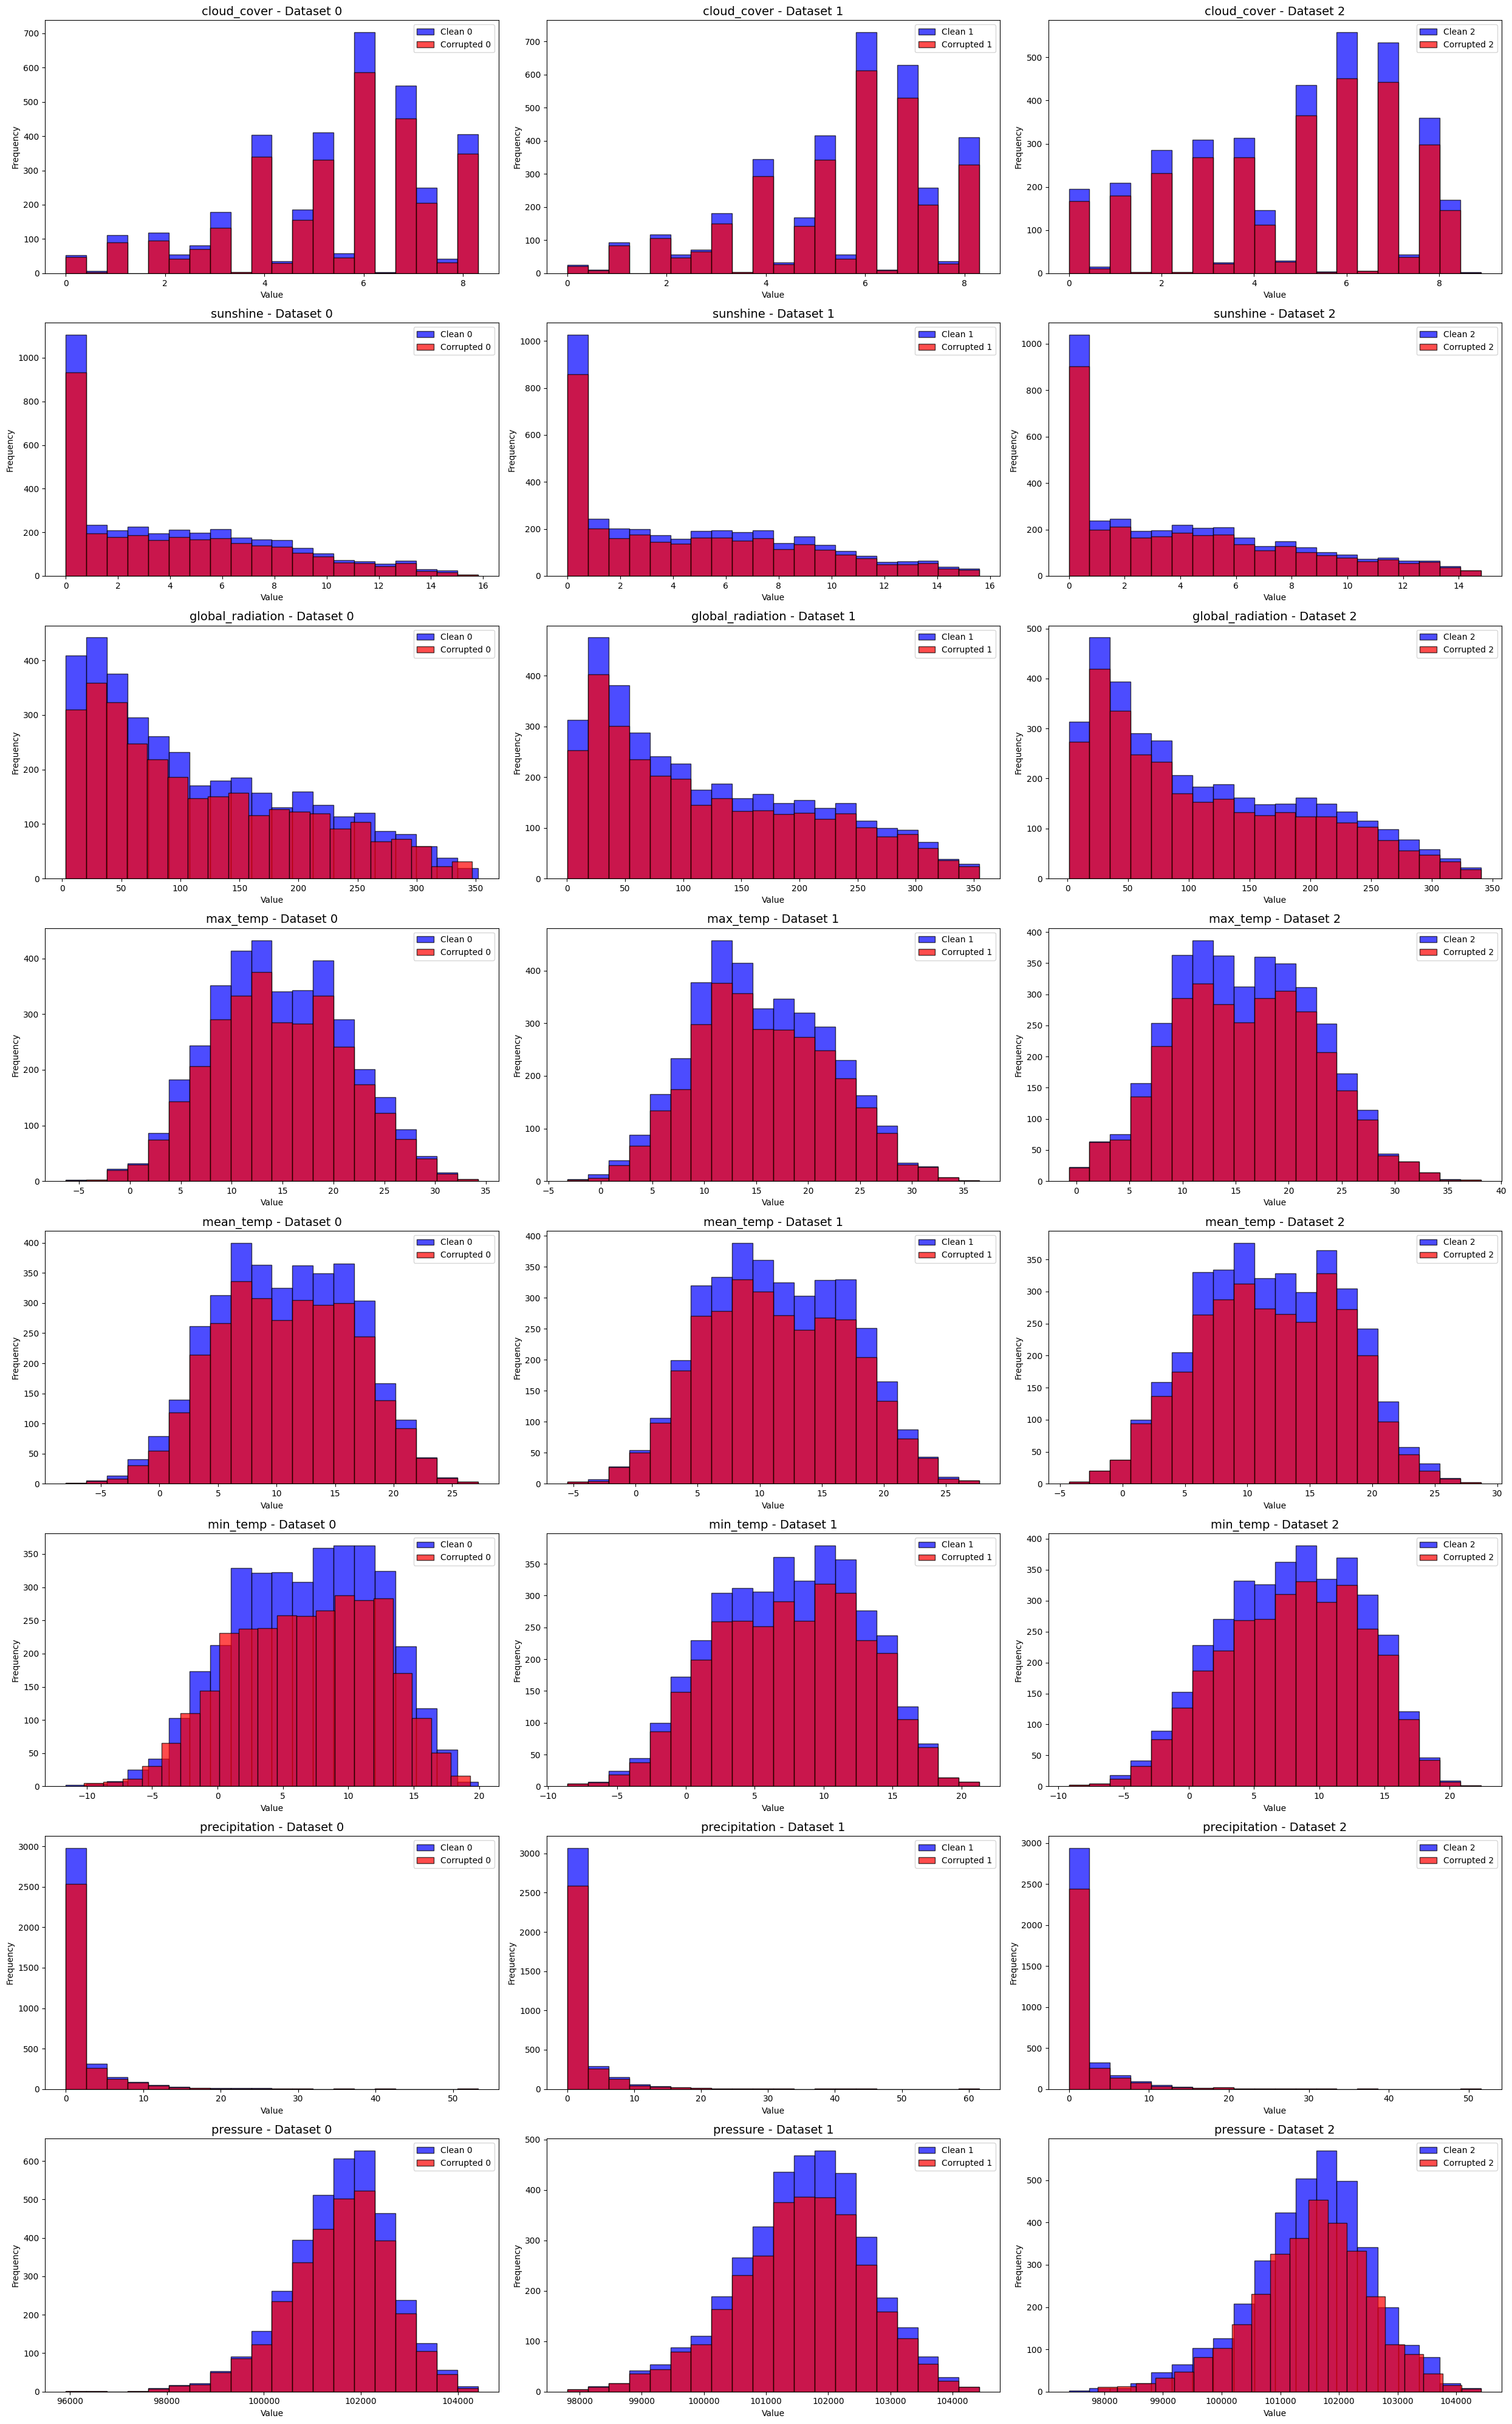

In [14]:
import matplotlib.pyplot as plt

datasets = [
    ('train_clean_data_0', 'train_corrupt_data_0'),
    ('train_clean_data_1', 'train_corrupt_data_1'),
    ('train_clean_data_2', 'train_corrupt_data_2')
]

fig, axes = plt.subplots(len(variables), len(datasets), figsize=(25, 40))

for j, (clean_data, corrupt_data) in enumerate(datasets):
    clean_df = globals()[clean_data]
    corrupt_df = globals()[corrupt_data]

    for i, var in enumerate(variables):
        axes[i, j].hist(clean_df[var], bins=20, alpha=0.7, color='blue', edgecolor='black', label=f'Clean {j}')
        axes[i, j].hist(corrupt_df[var], bins=20, alpha=0.7, color='red', edgecolor='black', label=f'Corrupted {j}')

        axes[i, j].set_title(f'{var} - Dataset {j}', fontsize=14)
        axes[i, j].set_xlabel('Value')
        axes[i, j].set_ylabel('Frequency')
        axes[i, j].legend()

plt.tight_layout()
plt.show()


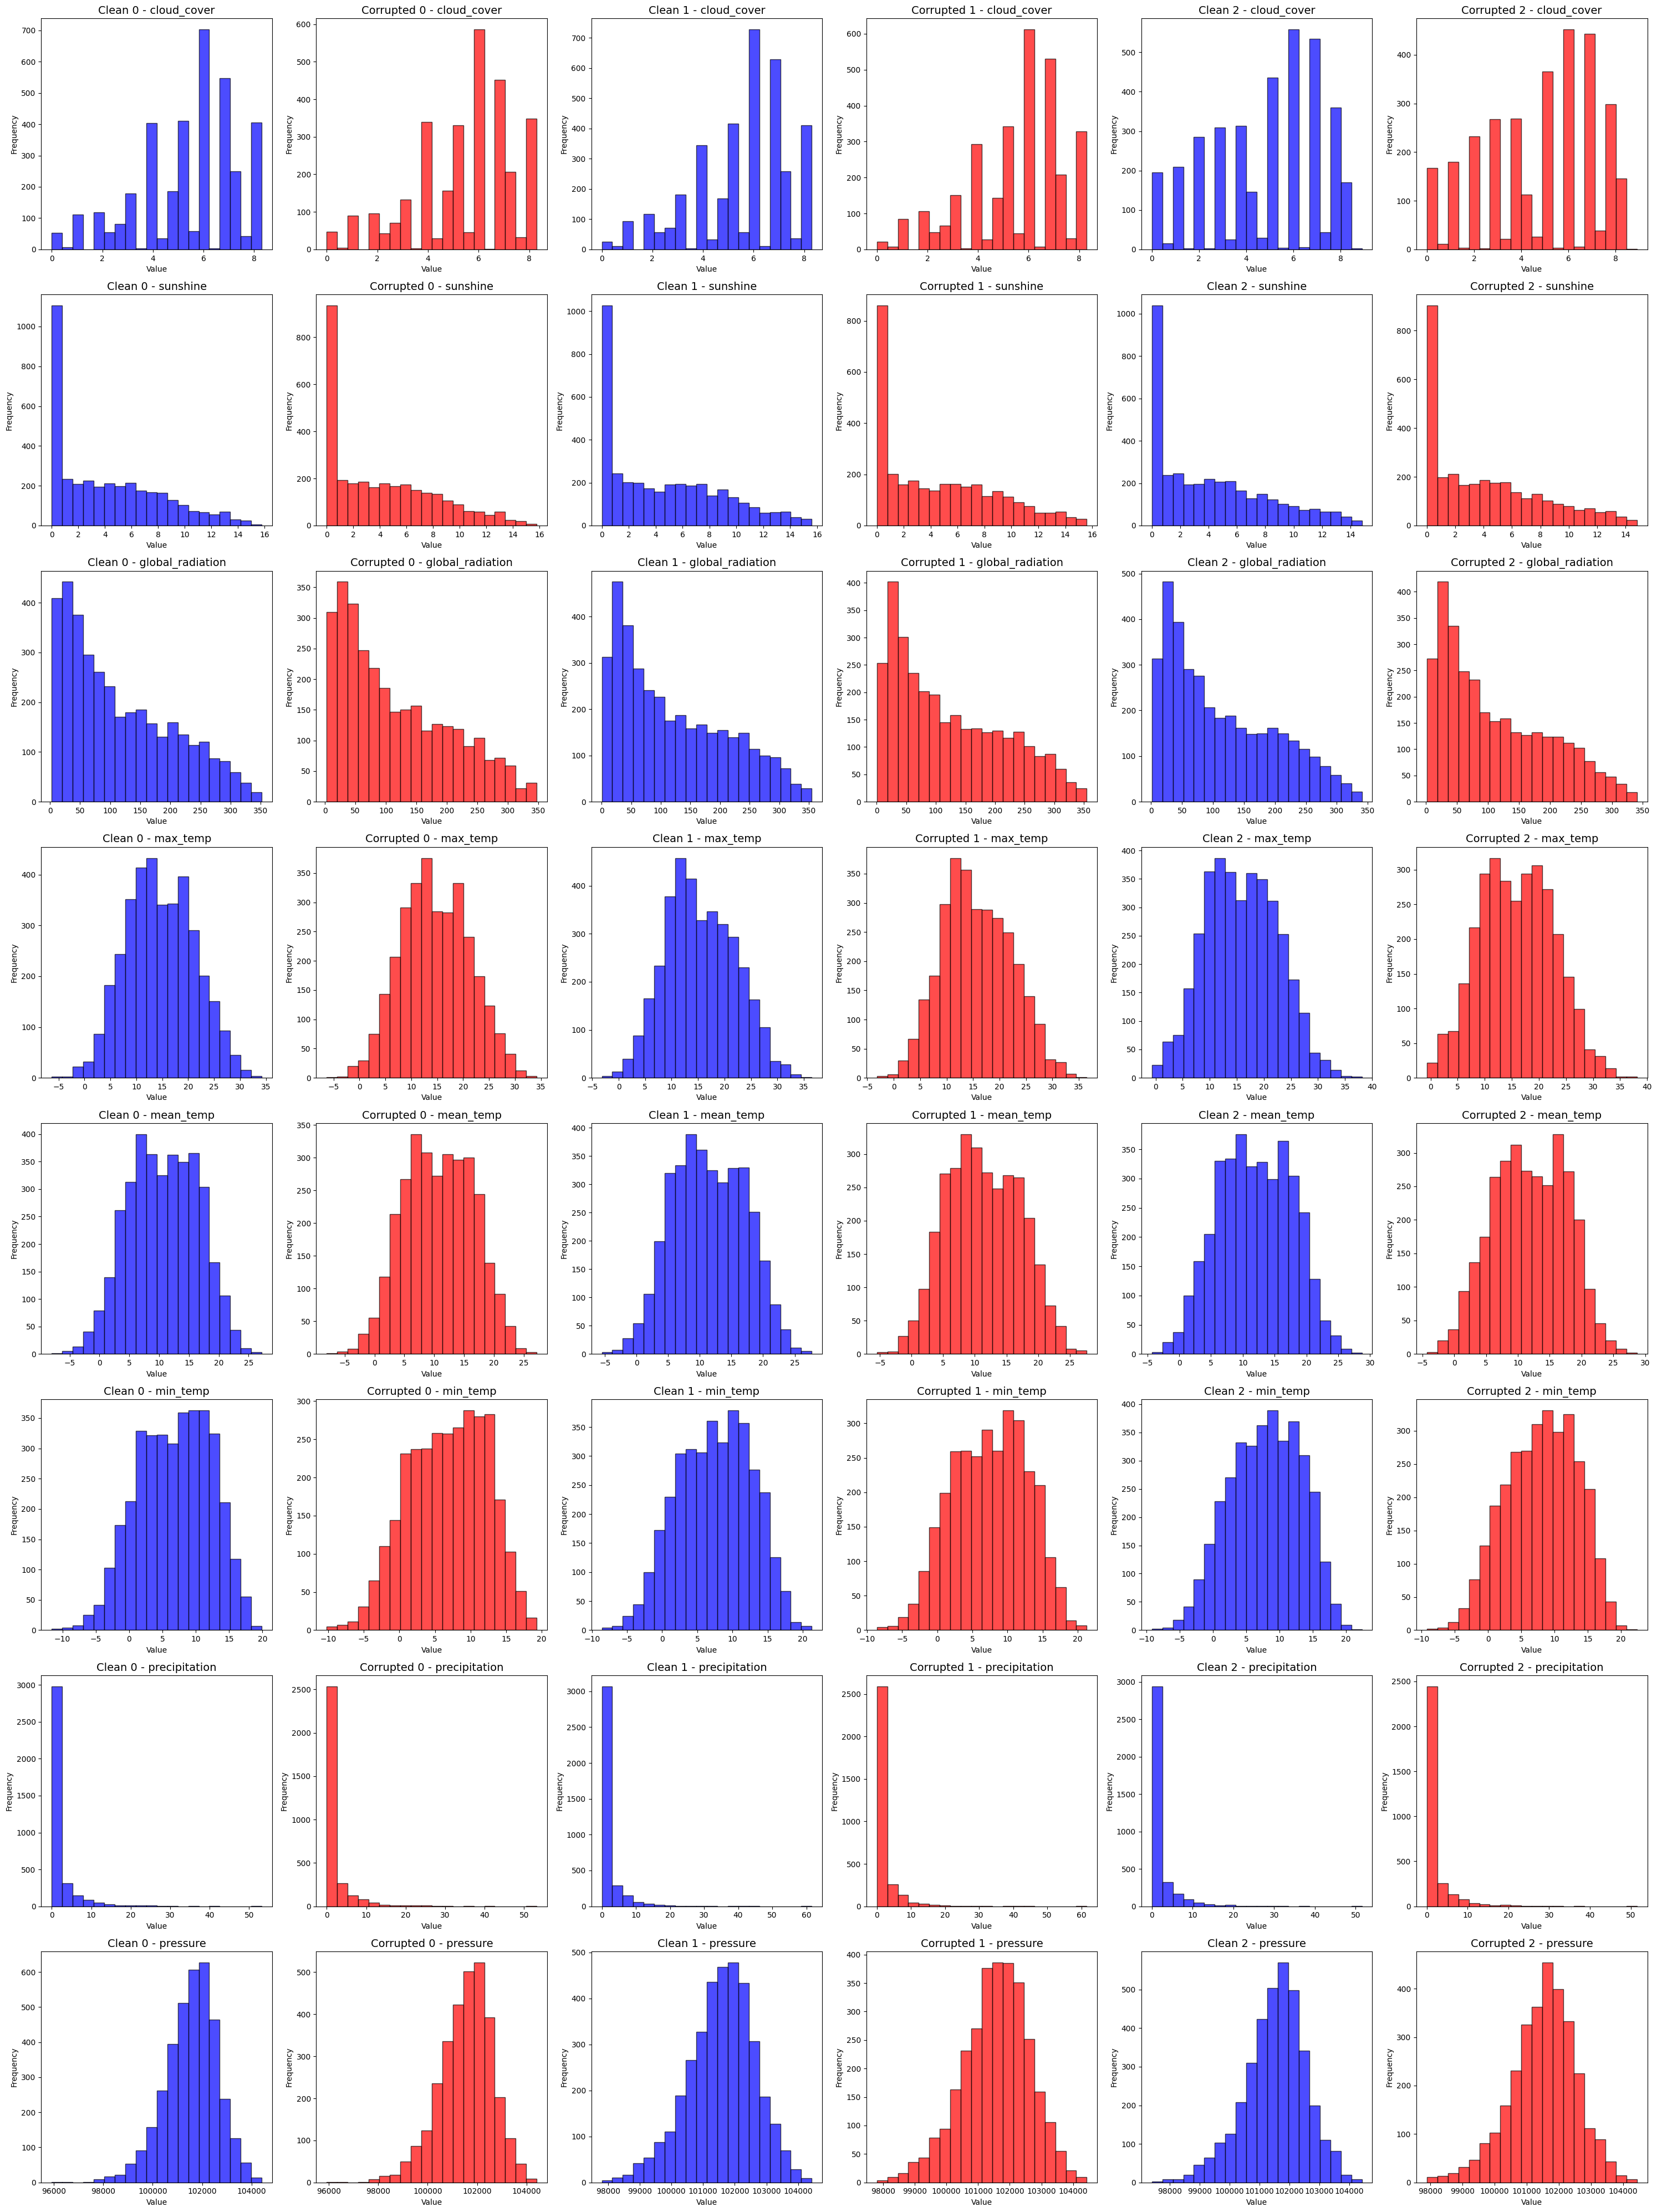

In [15]:
datasets = [
    ('train_clean_data_0', 'train_corrupt_data_0'),
    ('train_clean_data_1', 'train_corrupt_data_1'),
    ('train_clean_data_2', 'train_corrupt_data_2')
]

fig, axes = plt.subplots(len(variables), len(datasets) * 2, figsize=(30, 40))

for j, (clean_data, corrupt_data) in enumerate(datasets):
    clean_df = globals()[clean_data]
    corrupt_df = globals()[corrupt_data]

    for i, var in enumerate(variables):
        axes[i, 2*j].hist(clean_df[var], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axes[i, 2*j].set_title(f'Clean {j} - {var}', fontsize=14)
        axes[i, 2*j].set_xlabel('Value')
        axes[i, 2*j].set_ylabel('Frequency')

        axes[i, 2*j + 1].hist(corrupt_df[var], bins=20, alpha=0.7, color='red', edgecolor='black')
        axes[i, 2*j + 1].set_title(f'Corrupted {j} - {var}', fontsize=14)
        axes[i, 2*j + 1].set_xlabel('Value')
        axes[i, 2*j + 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

concat train dataset

In [29]:
train_clean_data = pd.concat([train_clean_data_0, train_clean_data_1, train_clean_data_2], ignore_index=True)
train_corrupt_data = pd.concat([train_corrupt_data_0, train_corrupt_data_1, train_corrupt_data_2], ignore_index=True)

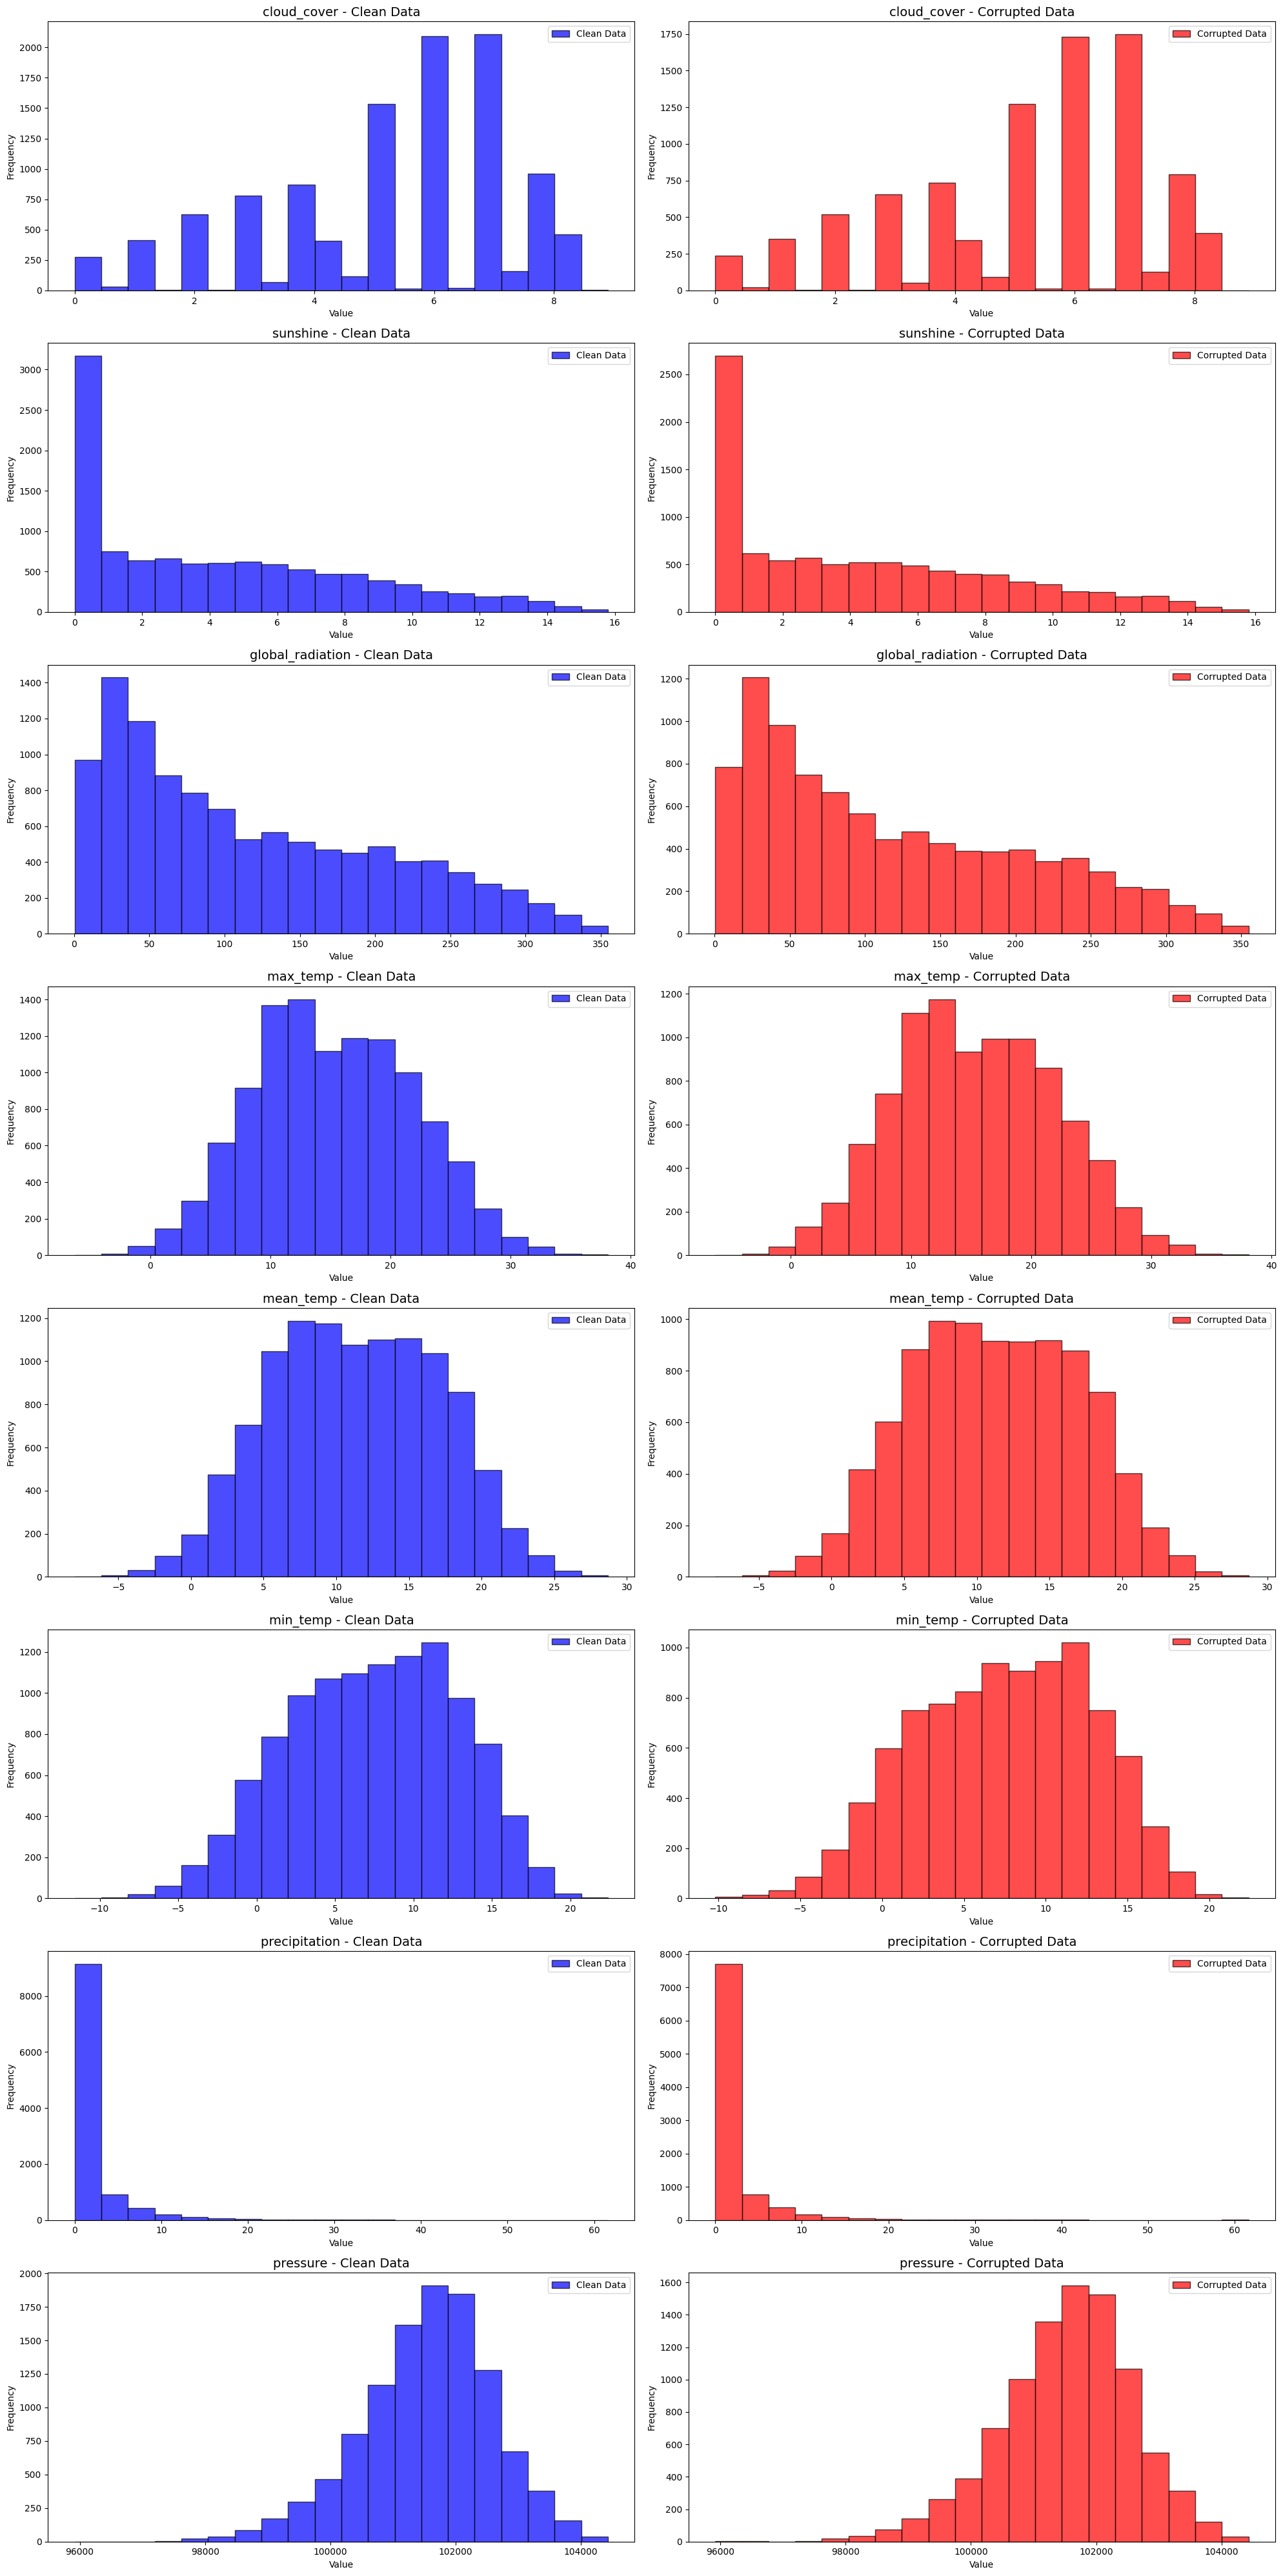

In [17]:
# 创建图形对象，行数为变量数，列数为 2（一个用于 clean 数据，一个用于 corrupt 数据）
fig, axes = plt.subplots(len(variables), 2, figsize=(20, 40))

# 绘制每个变量的直方图
for i, var in enumerate(variables):
    # 绘制 clean 数据的直方图（蓝色）
    axes[i, 0].hist(train_clean_data[var], bins=20, alpha=0.7, color='blue', edgecolor='black', label='Clean Data')
    axes[i, 0].set_title(f'{var} - Clean Data', fontsize=14)
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].legend()

    # 绘制 corrupt 数据的直方图（红色）
    axes[i, 1].hist(train_corrupt_data[var], bins=20, alpha=0.7, color='red', edgecolor='black', label='Corrupted Data')
    axes[i, 1].set_title(f'{var} - Corrupted Data', fontsize=14)
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].legend()

# 调整布局，防止重叠
plt.tight_layout()
plt.show()


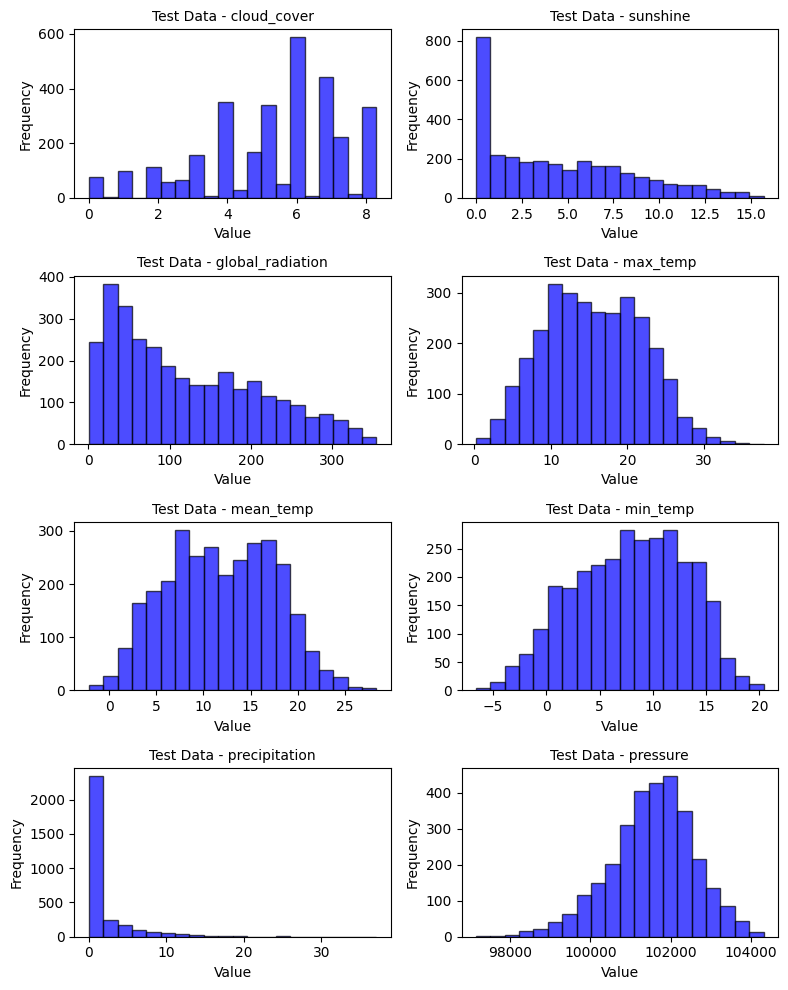

In [18]:
fig, axes = plt.subplots(4, 2, figsize=(8, 10))

clean_df = test_data

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2

    axes[row, col].hist(clean_df[var], bins=20, alpha=0.7, color='blue', edgecolor='black')
    axes[row, col].set_title(f'Test Data - {var}', fontsize=10)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<br>

---

<br>

## **Question 2**  (25%)

Using the data loaded in **Question 1**, create a PyTorch `TensorDataset`, and create one `DataLoader` for the training set and another one for the test set.

The training loader should provide batches of weather data that have been corrupted, as well as the corresponding, paired un-corrupted batch of data. The test loader should provide batches of corrupted weather data, with no corresponding uncorrupted labels.

Using line plots, show here one batch from both the training and test datasets before and after corruption. Use different axis windows for input and label of the batch.

<br>



In [19]:
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms

Train Loader

In [20]:
train_clean_tensor = torch.tensor(train_clean_data.values, dtype=torch.float64)
train_corrupt_tensor = torch.tensor(train_corrupt_data.values, dtype=torch.float64)

assert train_clean_tensor.size(0) == train_corrupt_tensor.size(0), "The number of samples must match!"

train_dataset = TensorDataset(train_clean_tensor, train_corrupt_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
train_clean_tensor[0]

tensor([ 0.0000e+00,  4.0000e+00,  2.0000e-01,  1.0600e+01,  2.1000e+00,
        -1.3000e+00, -4.2000e+00,  0.0000e+00,  1.0128e+05],
       dtype=torch.float64)

In [21]:
data_iter = iter(train_loader)
train_clean_data, train_corrupt_data = next(data_iter)

print("Clean data batch shape:", train_clean_data.shape)
print("Corrupt data batch shape:", train_corrupt_data.shape)

print("Clean data sample (first sample):", train_clean_data[0])
print("Corrupt data sample (first sample):", train_corrupt_data[0])


Clean data batch shape: torch.Size([64, 9])
Corrupt data batch shape: torch.Size([64, 9])
Clean data sample (first sample): tensor([6.0400e+02, 5.9000e+00, 3.2000e+00, 1.2880e+02, 2.3400e+01, 1.9600e+01,
        1.3900e+01, 0.0000e+00, 1.0274e+05], dtype=torch.float64)
Corrupt data sample (first sample): tensor([6.0400e+02, 5.9000e+00, 3.2000e+00, 1.2880e+02, 2.3400e+01, 1.9600e+01,
        1.3900e+01, 0.0000e+00, 1.0274e+05], dtype=torch.float64)


Test Loader

In [22]:
test_path = "/content/drive/MyDrive/dataset_dl2/test_set.csv"
test_data = pd.read_csv(test_path)

test_tensor = TensorDataset(torch.tensor(test_data.values, dtype=torch.float64))

batch_size = 64
test_loader = DataLoader(test_tensor, batch_size=batch_size, shuffle=False)

In [ ]:
test_tensor.shape

torch.Size([3652, 9])

In [ ]:
test_data_01 = next(iter(test_loader))[0]

print("Test data batch shape:", test_data_01.shape)

print("Test data sample (first sample):", test_data_01[:, 0][2].item())

Test data batch shape: torch.Size([64, 9])
Test data sample (first sample): 2.0


In [ ]:
test_data.iloc[0]

date                     0.0
cloud_cover              7.1
sunshine                 0.5
global_radiation        15.5
max_temp                11.1
mean_temp                7.4
min_temp                 4.6
precipitation            0.0
pressure            102472.1
Name: 0, dtype: float64

In [ ]:
test_data.iloc[0].dtype

dtype('float64')

Using line plots, show here one batch from both the training and test datasets before and after corruption. Use different axis windows for input and label of the batch.

In [ ]:
data_iter = iter(train_loader)
train_clean_data, train_corrupt_data = next(data_iter)


In [ ]:
train_clean_data.shape

torch.Size([64, 9])

In [ ]:
train_corrupt_data.shape

torch.Size([64, 9])

9


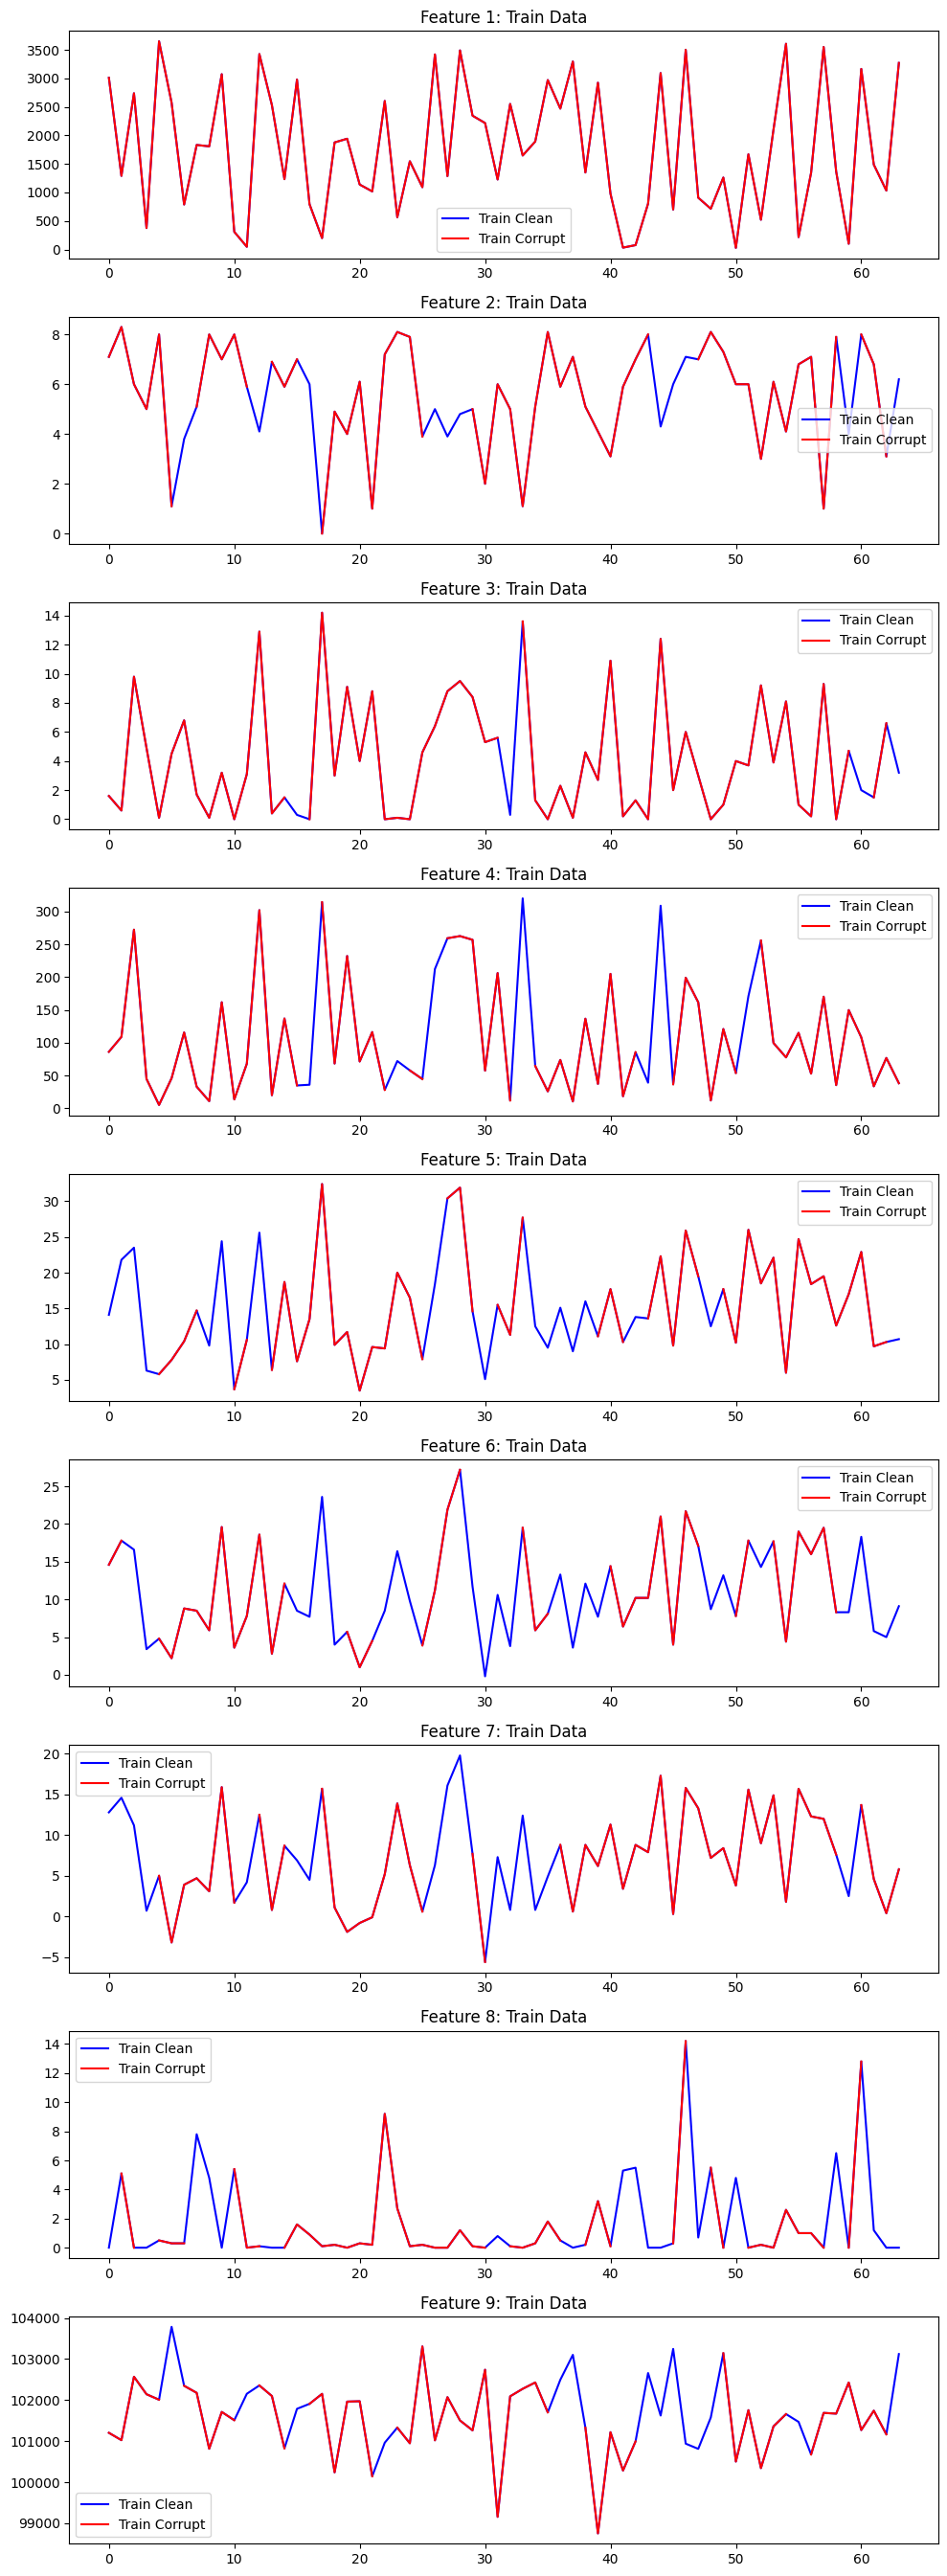

In [23]:
import torch
import matplotlib.pyplot as plt

# 从训练集和测试集中分别获取一个批次的数据
train_iter = iter(train_loader)
test_iter = iter(test_loader)

# 获取训练集和测试集的清晰和腐化数据
train_clean_data, train_corrupt_data = next(train_iter)
test_clean_data = next(test_iter)

# 获取数据的列数（假设有9个特征列和1个标签列）
num_features = train_clean_data.shape[1]
print(num_features)

# 绘制训练集的 8 张图
fig_train, axes_train = plt.subplots(num_features, 1, figsize=(10, num_features * 3))

for i in range(num_features):
    # 选择每个特征列的数据
    train_clean_input = train_clean_data[:, i].cpu().numpy()
    train_corrupt_input = train_corrupt_data[:, i].cpu().numpy()

    # 绘制清晰和腐化数据
    axes_train[i].plot(train_clean_input, label='Train Clean', color='blue')
    axes_train[i].plot(train_corrupt_input, label='Train Corrupt', color='red')
    axes_train[i].set_title(f'Feature {i+1}: Train Data')
    axes_train[i].legend()

fig_train.tight_layout()
plt.show()



In [24]:
data_iter = iter(test_loader)
test_data_01 = next(data_iter)[0]
print(test_data_01.shape)

torch.Size([64, 9])


In [ ]:
data_iter.shape

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'shape'

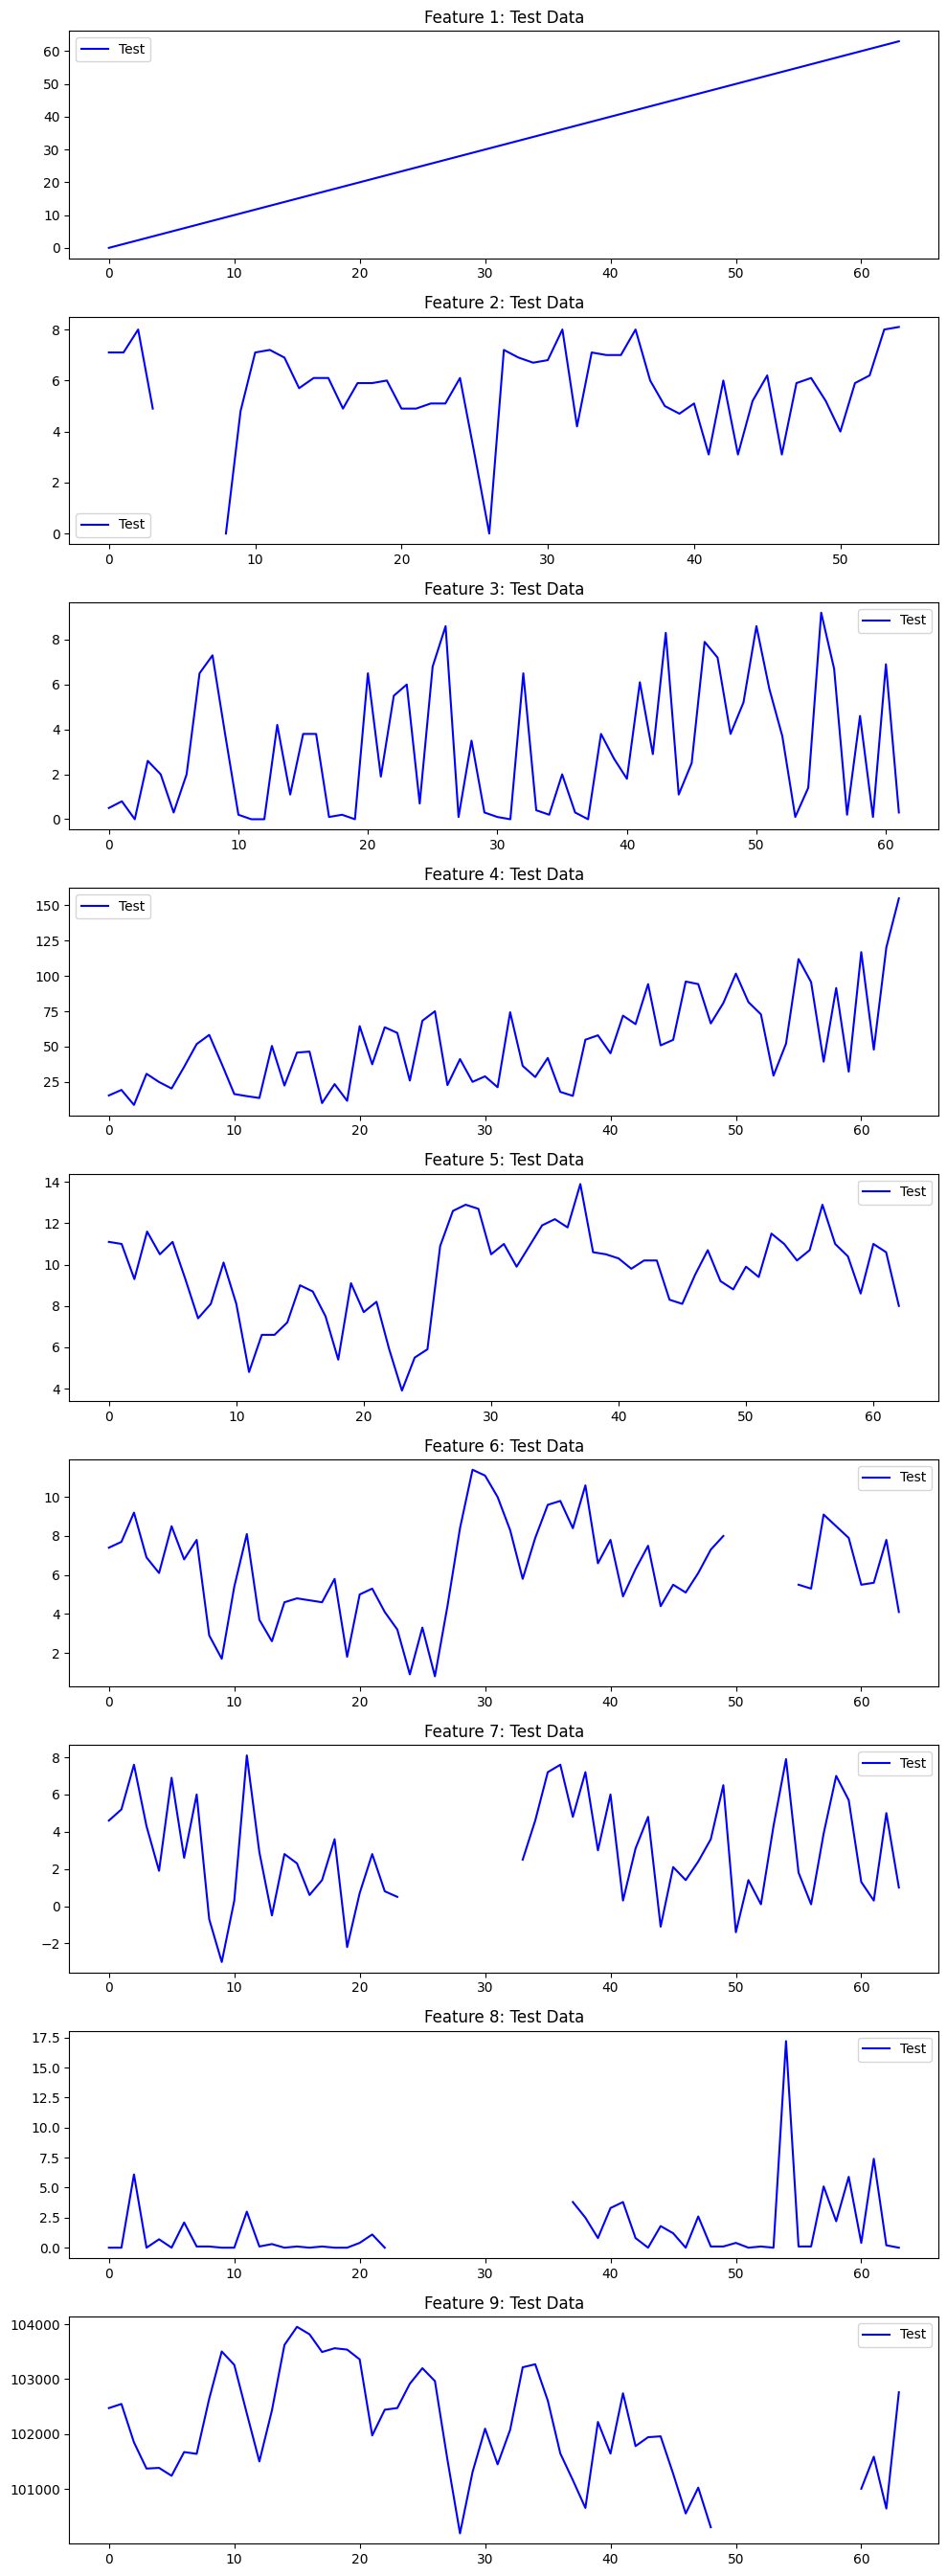

In [25]:

num_features = 9
fig_test, axes_test = plt.subplots(num_features, 1, figsize=(10, num_features * 3))

for i in range(num_features):
    axes_test[i].plot(test_data_01[:, i].cpu().numpy(), label='Test', color='blue')
    axes_test[i].set_title(f'Feature {i+1}: Test Data')
    axes_test[i].legend()

fig_test.tight_layout()
plt.show()

<br>

---

<br>

## **Question 3** (50%)

Using the dataset created in **Question 2**, design and train an architecture to recover the missing weather values of the provided test dataset.

Using line plots, show the test weather data with the missing values filled in using a different colour.

Additionally, save the test data with the missing values filled in into a file called `test_set_nogaps.csv` inside this repository. This file should have the same format as the original `test_set.csv` file, with the same number of rows and columns, the same row and column ordering, and the same column headings.

You have freedom to choose an architecture that you consider appropriate to solve this problem. However, you will need to train your chosen architecture as part of the assessment: **pre-trained networks are not allowed**.

You will be assessed by the quality of your predictions of the missing data values and additional marks will be given for originality in your network design choices. You should include, as part of your answer, a paragraph explaining the architecture you have chosen and any additional design choices and hyperparameters that have been important to build your solution.

This is an open-book assessment and you are encouraged to use resources online, including  tools like chatGPT. However, make sure to always mention the sources for your code and ideas, including websites, papers, and tools like chatGPT.

<br>


In [45]:
# class LSTM_GEN(nn.Module):

#     def __init__(self, input_size, hidden_size, num_layers):
#         super().__init__()

#         self.input_size = input_size
#         # self.embedding_dim = embedding_dim
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         # self.num_unique_words = num_unique_words

#         # self.embedding = nn.Embedding(self.num_unique_words, self.embedding_dim)                   # add a nn.Embedding

#         self.lstm = nn.LSTM(self.input_size, self.hidden_size, num_layers=self.num_layers,         # add the LSTM
#                             bias=False, batch_first=True)

#         self.h2o = nn.Linear(self.hidden_size, self.input_size)     # create a final linear layer from hidden state to network output

#     def init_hidden(self,  batch_size=1):
#         # initialise the hidden state
#         return (torch.zeros(self.num_layers, batch_size, self.hidden_size, requires_grad=False).to(device),
#                 torch.zeros(self.num_layers, batch_size, self.hidden_size, requires_grad=False).to(device))

#     def forward(self, x):
#         batch_size = x.size(0)
#         hidden, cell = self.init_hidden(batch_size)          # initialise hidden state

#         # embedded = self.embedding(x)                         # store the word embeddings
#         # output, hidden, cell = self.lstm(embedded, hidden, cell)   # apply the LSTM
#         # output, hidden, cell = self.lstm(input_size, hidden, cell)   # apply the LSTM
#         output, (hidden, cell) = self.lstm(x, (hidden, cell))
#         output = self.h2o(output)                            # apply the final mapping

#         return output

In [162]:
import torch
import torch.nn as nn

class LSTM_GEN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM_GEN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM 层
        self.lstm = nn.LSTM(input_size=self.input_size,
                            hidden_size=self.hidden_size,
                            num_layers=self.num_layers,
                            bias=False,
                            batch_first=True)

        # 最终映射到输出层
        self.h2o = nn.Linear(self.hidden_size, self.input_size)

    def init_hidden(self, batch_size):
        # 初始化隐状态和细胞状态
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        return h0, c0

    def forward(self, x):
        batch_size = x.size(0)  # 从输入数据中推断批次大小
        hidden, cell = self.init_hidden(batch_size)  # 初始化隐藏状态

        # 通过 LSTM 层
        output, (hidden, cell) = self.lstm(x, (hidden, cell))

        # 最终映射到输出
        output = self.h2o(output)  # 将 LSTM 输出映射到最终的预测输出
        return output


In [168]:
import torch
import torch.nn as nn

def train_lstm_gen(model, optimizer, criterion, dataloader, device):
    model.train()  # 设置模型为训练模式
    train_loss = 0  # 初始化损失

    for i, (x, y) in enumerate(dataloader):  # 遍历数据集
        x, y = x.to(device), y.to(device)  # 将数据移到设备上（GPU/CPU）

        optimizer.zero_grad()  # 重置梯度
        y_pred = model(x)  # 获取模型输出

        loss = criterion(y_pred, y)  # 计算损失
        train_loss += loss * x.size(0)  # 累加损失

        loss.backward()  # 反向传播
        optimizer.step()  # 更新模型参数

    return train_loss / len(dataloader.dataset)  # 返回平均损失

def valid_lstm_gen(model, optimizer, criterion, dataloader, device):
    model.eval()  # 设置模型为评估模式

    valid_loss = 0  # 初始化损失

    with torch.no_grad():
        for i, (x, y) in enumerate(dataloader):
            x, y = x.to(device), y.to(device)  # 将数据移到设备上（GPU/CPU）
            y_pred = model(x)
            loss = criterion(y_pred, y)  # 计算损失
            valid_loss += loss * x.size(0)

    return valid_loss / len(dataloader.dataset)  # 返回平均损失


def predict_lstm_gen(dataset, model, text, next_words=10):
    model.eval()  # set model to evaluation mode

    words = text.split(' ')

    for i in range(next_words):  # loop over words
        x = torch.tensor([[dataset.word_to_idx[word] for word in words[i:]]]).to(device)  # take word from dataset and send to device
        y_pred = model(x)                                                                 # compute output and hidden state

        last_word_logits = y_pred[0][-1]                                                  # take last output

        p = torch.nn.functional.softmax(last_word_logits, dim=0).detach().cpu().numpy()   # obtain probability vector for last output
        word_idx = np.random.choice(len(last_word_logits), p=p)                           # sample probability vector to get index in dataset

        words.append(dataset.idx_to_word[word_idx])                                       # get word corresponding to dataset

    return ' '.join(words)

data preprocessing

In [164]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler


# 对缺失值插值（假设 train_corrupt_data 是一个 Pandas DataFrame）
train_corrupt_data_filled = train_corrupt_data.interpolate(method='linear', limit_direction='forward', axis=0)
train_missing_mask = train_corrupt_data.isna().astype(float).values  # 记录缺失值的位置

# 数据归一化
scaler = MinMaxScaler()
train_corrupt_data_scaled = scaler.fit_transform(train_corrupt_data_filled)[:, :-1]
train_clean_data_scaled = scaler.fit_transform(train_clean_data)[:, :-1]

# 滑动窗口参数
seq_len = 5

# 构造输入和目标值
input_data = []
target_data = []

for i in range(len(train_corrupt_data_scaled) - seq_len):
    input_data.append(train_corrupt_data_scaled[i:i + seq_len])  # 输入：当前窗口
    target_data.append(train_clean_data_scaled[i+1:i + seq_len+1])  # 目标：下一步的数据

In [131]:
input_data = torch.tensor(input_data)
print(input_data.size())

torch.Size([10949, 5, 8])


In [147]:
train_clean_data_scaled.shape

(10954, 8)

In [149]:
target_data = torch.tensor(target_data)
target_data.size()

torch.Size([10949, 8])

split train dataset and validation dataset

In [165]:
# 将数据转换为 PyTorch 张量
# train_clean_tensor = torch.tensor(train_clean_data.iloc[:, :-1].values, dtype=torch.float32)
# train_corrupt_tensor = torch.tensor(train_corrupt_data_filled.iloc[:, :-1].values, dtype=torch.float32)
# 将数据转换为 PyTorch 的 Tensor
input_data = torch.tensor(input_data, dtype=torch.float32)
target_data = torch.tensor(target_data, dtype=torch.float32)

# 获取数据集总长度
dataset_size = len(input_data)

# 定义前 80% 和后 20% 的索引
train_size = int(0.8 * dataset_size)  # 前 80% 作为训练集
valid_size = dataset_size - train_size  # 后 20% 作为验证集

# 切分数据集为训练集和验证集
train_input_tensor, valid_input_tensor = input_data[:train_size], input_data[train_size:]
train_target_tensor, valid_target_tensor = target_data[:train_size], target_data[train_size:]

# 构建 TensorDataset
train_dataset = TensorDataset(train_input_tensor, train_target_tensor)
valid_dataset = TensorDataset(valid_input_tensor, valid_target_tensor)

# 构建 DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [86]:
train_clean_data.iloc[:, :-1].shape

(10954, 8)

In [166]:
input_data.shape

torch.Size([10949, 5, 8])

interpolate missing data

In [40]:
!pip install livelossplot

In [99]:
len(train_loader)

137

In [97]:
len(valid_loader)

35

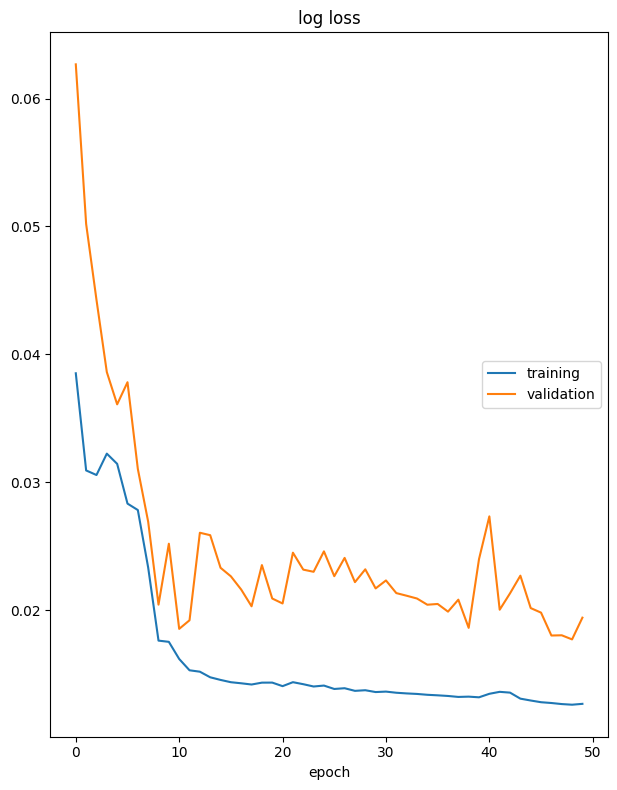

log loss
	training         	 (min:    0.013, max:    0.039, cur:    0.013)
	validation       	 (min:    0.018, max:    0.063, cur:    0.019)


In [169]:
from livelossplot import PlotLosses

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = 8
n_hidden = 128
n_layers = 3
# embedding_dim = input_size
# n_unique_words = len(words_dataset.unique_words)
batch_size = 64
# sequence_length = 4

lr = 5e-3
n_epochs = 50

lstm_gen = LSTM_GEN(input_size, n_hidden, n_layers).to(device)  # create LSTM network
# print(f'The model has {count_trainable_parameters(lstm_gen):,} trainable parameters')

criterion = nn.MSELoss()  # select a criterion
optimizer = torch.optim.Adam(lstm_gen.parameters(), lr=lr)  # create an optimiser

liveloss = PlotLosses()

for i in range(n_epochs):
    train_loss = train_lstm_gen(lstm_gen, optimizer, criterion, train_loader, device)
    valid_loss = valid_lstm_gen(lstm_gen, optimizer, criterion, valid_loader, device)

     # Liveloss plot
    logs = {}
    logs['' + 'log loss'] = train_loss.item()
    logs['val_' + 'log loss'] = valid_loss.item()
    liveloss.update(logs)
    liveloss.draw()

<br>

---

<br>